In [1]:
import os
import numpy as np
from py3helpers.aws import AwsS3
from rrna_analysis.plot_experiment_table import plot_acc_heatmap_for_experiment
from rrna_analysis.multiple_model_accuracy import plot_accuracy_vs_delta_and_accuracy_over_time, preprocess_accuracy_csv
from rrna_analysis.kmer_pos_mapping import KmerPosMapping
import pandas as pd

mods_csv = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/mod_file.csv"
reference = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/yeast_25S_18S.fa"
alt_c_positions = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/alt_canonical_distribution/yeast_18S_25S_variants.positions"
# positions = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/yeast_18S_25S_variants.positions"
kpm = KmerPosMapping(reference, alt_c_positions, mods_csv)
# client = AwsS3()


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [3]:
kpm.mod_handler
kpm.mod_handler.sort_values(by=['percent'])[["percent", "reference_index"]]


,percent,reference_index
105,58,2943
9,60,465
11,67,561
57,70,1109
8,73,435
40,74,662
92,75,2728
46,75,875
82,77,2346
45,78,866


In [4]:
model_n = 30
# key="accuracy"
# key="recall"
# key="specificity"
# key="precision"
# key="negative_predictive_value"
# key="recall"
# key="f1_score"
# key="brier_score"

max_percent=100
min_percent=0
min_delta=0
max_delta=np.inf

_ivt_and_native="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/ivt_and_native_training/train_500_test_500_prob_0.5_em_iterations_30_all_kmers_ivt_and_native_training"
_30_rounds="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/gaussian_distribution_testing/train_500_test_500_prob_0.5_em_iterations_30_USE_MEDIAN_false_MIN_SD_0"
_native_all_kmers="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/only_covered_kmers_training/train_500_test_500_prob_0.5_em_iterations_30_all_kmers"
_unsup_60="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/unsupervised/fraction_sweep/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_60_USE_IVT_TRAINING_true_unsupervised_true_all_kmers_true"
_unsup_70="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/unsupervised/fraction_sweep/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_70_USE_IVT_TRAINING_true_unsupervised_true_all_kmers_true"
_unsup_80="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/unsupervised/fraction_sweep/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_80_USE_IVT_TRAINING_true_unsupervised_true_all_kmers_true"
_unsup_90="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/unsupervised/fraction_sweep/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_90_USE_IVT_TRAINING_true_unsupervised_true_all_kmers_true"
_unsup_90_no_ivt="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/unsupervised/fraction_sweep/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_90_USE_IVT_TRAINING_true_unsupervised_true_all_kmers_false"
_unsup_alt_can="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/alt_canonical/gaussian/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_90_USE_IVT_TRAINING_true_unsupervised_true_all_kmers_false"
_alt_can="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/alt_canonical/gaussian/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false"
_alt_can_all_k = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/alt_canonical/gaussian/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_true_alt_c_6mer"

_alt_can_60 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/alt_canonical/gaussian_60/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_alt_c_6mer"
_alt_can_pretrain_all_k = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/alt_canonical/gaussian/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_true_alt_c"
_median_small_07 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/test/train_500_test_500_prob_0.7_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true"


# top_dirs = [_30_rounds, _native_all_kmers, _ivt_and_native]
top_dirs = [_unsup_60, _unsup_70, _unsup_80, _unsup_90, _unsup_90_no_ivt, _ivt_and_native]
top_dirs = [_30_rounds, _unsup_90_no_ivt, _ivt_and_native, _unsup_90, _alt_can, _unsup_alt_can]
top_dirs = [_30_rounds, _ivt_and_native, _alt_can, _unsup_alt_can]

# top_dirs = [_unsup_90_no_ivt, _30_rounds]
# round_n = [1, 30]
round_n = 30
overwrite=False

In [5]:
key="accuracy"
high_percent=100
low_percent=0
low_delta=0
high_delta=np.inf
max_delta=True
aot=True
avd=True
model_n = 30


In [7]:
mods_csv = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/mod_file.csv"
reference = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/yeast_25S_18S.fa"
small_5mer_positions = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/small_models/small_5mer/yeast_18S_25S_variants.positions"
# positions = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/yeast_18S_25S_variants.positions"
canonical_replacement = {"A": "a", "T": 'a', "G": "a", "C": "a"}
kpm = KmerPosMapping(reference, small_5mer_positions, mods_csv, canonical_replacement=canonical_replacement)


<IPython.core.display.Javascript object>


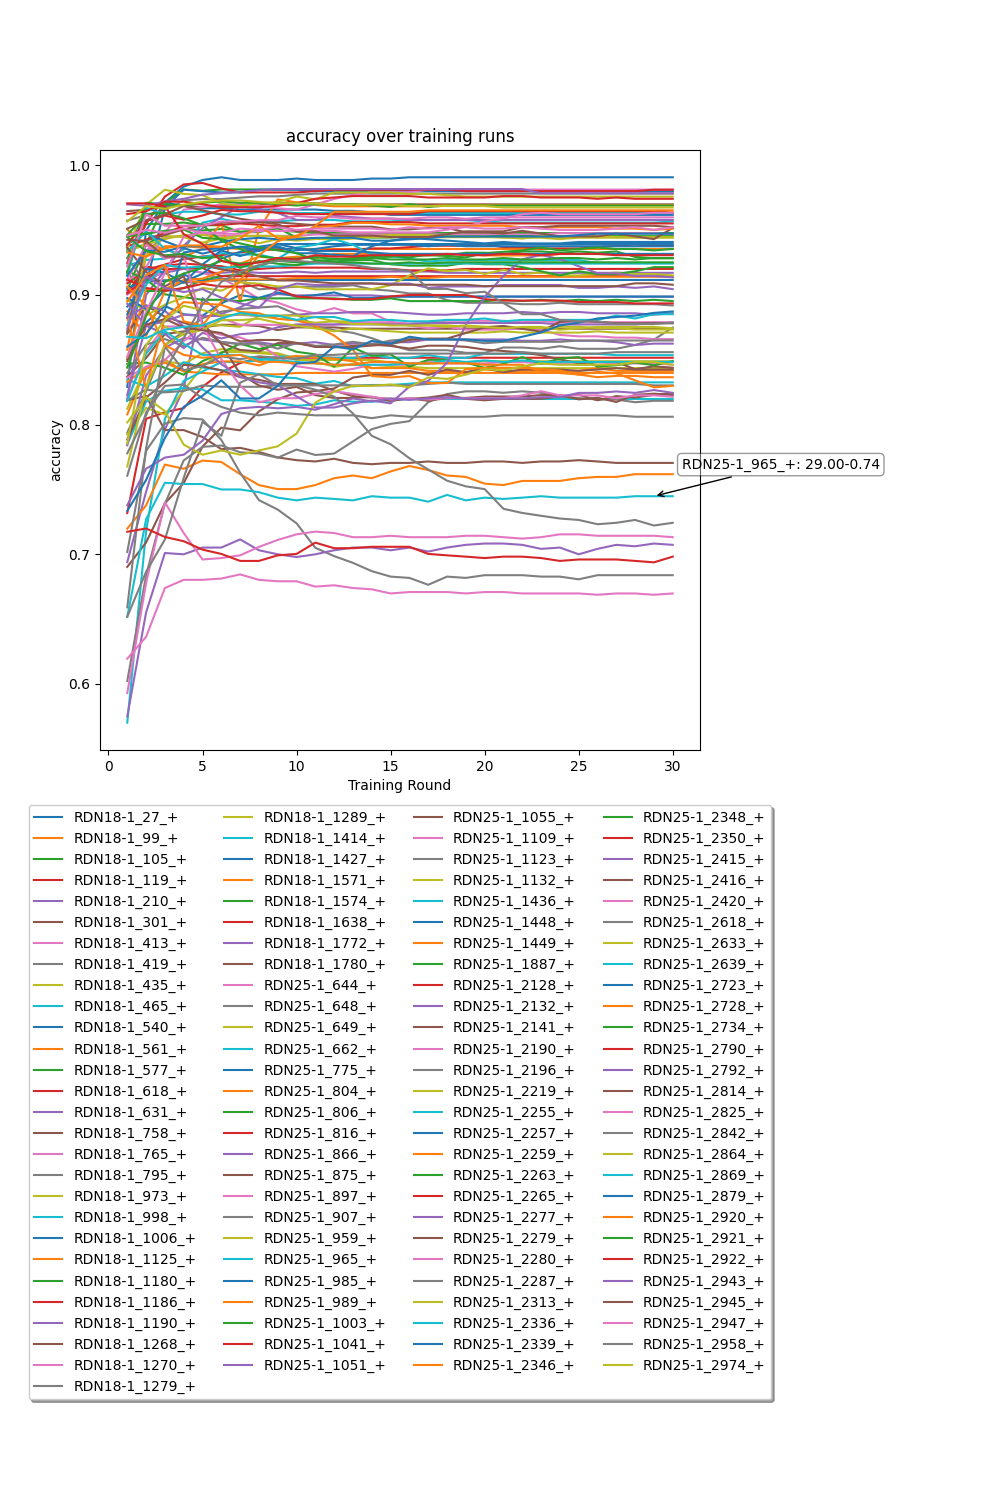

<IPython.core.display.Javascript object>


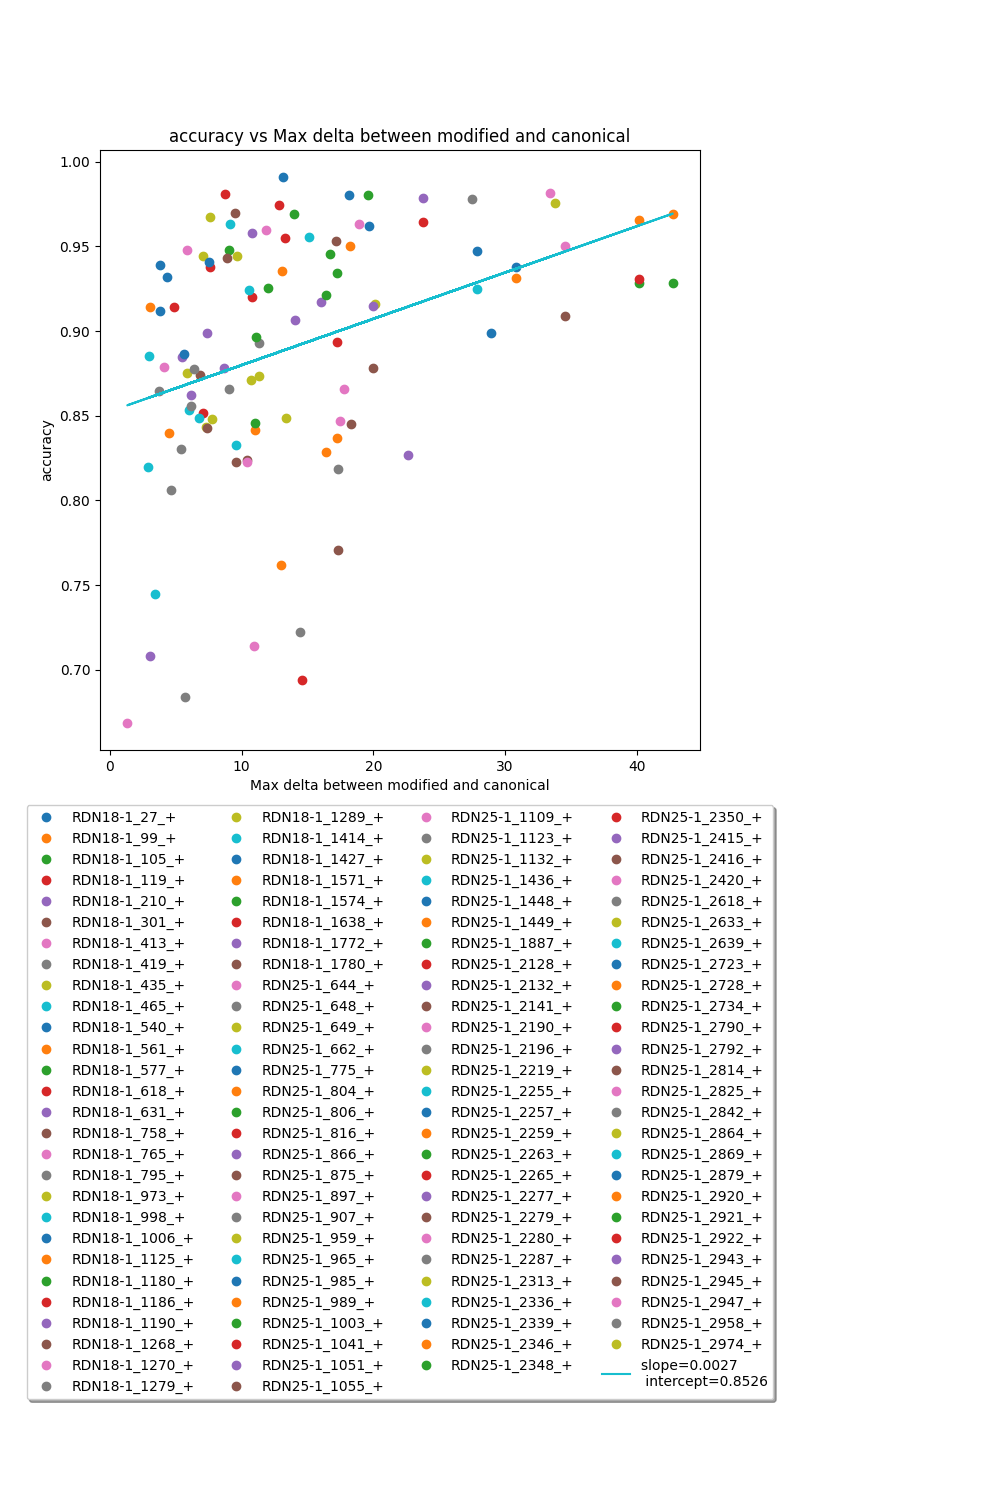

In [9]:
%matplotlib notebook
experiment_path = _median_small_07

dir_path = os.path.join(experiment_path, "training_accuracy_csvs")
model_dir = os.path.join(experiment_path, "training_models")
p, k = plot_accuracy_vs_delta_and_accuracy_over_time(kpm,
                                                     dir_path, 
                                                     model_dir, 
                                                         model_n, 
                                                         high_percent=high_percent, 
                                                         low_percent=low_percent, 
                                                         low_delta=low_delta, 
                                                         high_delta=high_delta, 
                                                         key=key, 
                                                         max_delta=max_delta,
                                                         aot=aot,
                                                         avd=avd)  
